In [2]:
import ppinot4py
from ppinot4py import model
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter

#log = pm4py.read_xes('P2P_CoatXR_10_vendors.xes')
#df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

parsing log, completed traces ::   0%|          | 0/62968 [00:00<?, ?it/s]

In [106]:
import pandas as pd
df = pd.read_csv('log.csv')

In [107]:
df = df.drop(columns=['Unnamed: 0'])

In [108]:
df = df.rename({'case:(case) Sub spend area text':'Area'}, axis=1)
df = df.rename({'case:(case) Purchasing Document':'Document'},axis=1)
df = df.rename({'case:Cumulative net worth (EUR)':'NET'},axis=1)

In [109]:
labels = df[df['Area']=='Labels']
net = labels[['Document','NET']].groupby('Document').mean()
net = net.reset_index()

In [111]:
net['NET'].sum()

4142408.2967667896

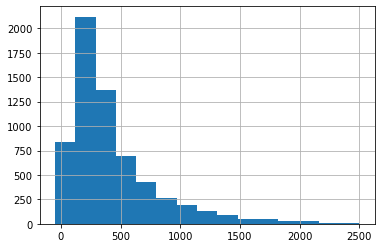

In [112]:
import matplotlib.pyplot as plt
net['NET'].hist(bins=15,range=(-50,2500))
#plt.show()
plt.savefig('labels.png')

In [113]:
products = df[df['Area']=='Products for Resale']
net = products[['Document','NET']].groupby('Document').mean()
net = net.reset_index()

In [114]:
net['NET'].sum()

211582.03561266523

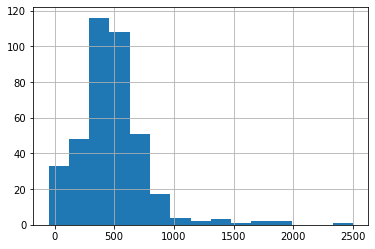

In [115]:
net['NET'].hist(bins=15,range=(-50,2500))
#plt.show()
plt.savefig('products.png')

In [116]:
cont = df[(df['Area']=='Plastic Containers & Lids < 30L') | (df['Area']=='Metal Containers & Lids < 30L')]
net = cont[['Document','NET']].groupby('Document').mean()
net = net.reset_index()

In [117]:
net.head()

,Document,NET
0,4507000223,867.000000
1,4507000225,1467.000000
2,4507000277,721.000000
3,4507000280,542.678571
4,4507000372,2168.000000


In [118]:
net['NET'].sum()

7468615.169789454

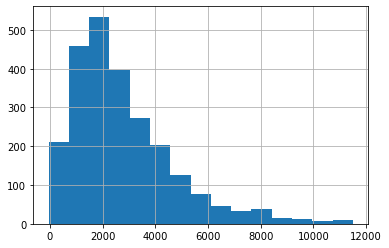

In [119]:
net['NET'].hist(bins=15,range=(-50,11500))
#plt.show()
plt.savefig('containers.png')

In [120]:
df['Area'].unique()

array(['Labels', 'Plastic Containers & Lids < 30L',
       'Metal Containers & Lids < 30L', 'Products for Resale',
       'Trading products (old structure)', 'Packaging', nan,
       'Technical Services', 'Packaging - Other', 'Color Collateral'],
      dtype=object)

In [121]:
rest = df[(df['Area']!='Plastic Containers & Lids < 30L') & (df['Area']!='Metal Containers & Lids < 30L') & (df['Area']!='Products for Resale') & (df['Area']!='Labels')]
net = rest[['Document','NET']].groupby('Document').mean()
net = net.reset_index()

In [122]:
net['NET'].sum()

1944554.1783252778

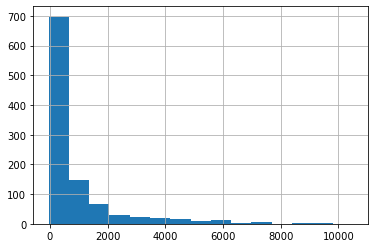

In [123]:
net['NET'].hist(bins=15,range=(-50,10500))
#plt.show()
plt.savefig('rest.png')